In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from collections import defaultdict
import logging
import random
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
# from IPython.display import display
# from pandas.io.formats.style import Styler


# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_columns', None)
# # Prevent rendering text between '$' as MathJax expressions
# pd.set_option('display.html.use_mathjax', False)

# # UUID for CSS styles used by pandas styler.
# # Keeps our notebook HTML deterministic when displaying dataframes
# _STYLE_UUID = "pybfstyle"


# class MyStyler(Styler):
#     """A custom styler for displaying DataFrames in HTML"""

#     def __repr__(self):
#         return repr(self.data)


# def show(df):
#     """
#     Displays a dataframe as HTML table.

#     Replaces newlines and double-spaces in the input with HTML markup, and
#     left-aligns the text.
#     """

#     # workaround for Pandas bug in Python 2.7 for empty frames
#     if not isinstance(df, pd.DataFrame) or df.size == 0:
#         display(df)
#         return
#     df = df.replace('\n', '<br>', regex=True).replace('  ', '&nbsp;&nbsp;',
#                                                       regex=True)
#     display(MyStyler(df).set_uuid(_STYLE_UUID).format(get_html)
#             .set_properties(**{'text-align': 'left', 'vertical-align': 'top'}))


In [2]:
ranking = [('rt73in01m5cr', 0.03883893607572654),('rt73in00m4cr', 0.03883893607572654),('rt73in13p5ds', 0.027682694166130957),('rt73in12p5ds', 0.027682694166130957),('rt55in00hrcr', 0.025422510183071),('rt75in01hrcr', 0.025422510183071),('st75hr83', 0.019753487693442033),('st75hr82', 0.01971495383713335),('rt75in05hrds', 0.01619138977522491),('rt73ve11m5ar', 0.01613583788402078),('rt73ve10m4ar', 0.01613583788402078),('st55in80hras', 0.01601753069358239),('rt73in10p4ds', 0.01572259786086414),('rt73in11p4ds', 0.01572259786086414),('st73in47p5as', 0.014380165745040824),('st73in46p5as', 0.014380165745040824),('rt55in81hrtn', 0.013895334147276752),('rt55in80hrtn', 0.013895334147276752),('rt55in10hrds', 0.013712161135965925),('rt75in11hrds', 0.013712161135965923),('rt55in04hrds', 0.013330688993924259),('st55in81hras', 0.012293181860751073),('rt55dxce01', 0.011363636363636364),('ts55dxnt01', 0.011363636363636364),('rt73sn15m5ce', 0.011363636363636362),('rt55sn15hrce', 0.011363636363636362),('rt73sn10m4cr', 0.011363636363636362),('rt73sn11m5cr', 0.011363636363636362),('rt75sn14hrce', 0.011363636363636362),('rt55sn11hrcr', 0.011363636363636362),('rt73sn14m4ce', 0.011363636363636362),('rt75sn10hrcr', 0.011363636363636362),('st73in66p5as', 0.01050534096826229),('st73in64p5as', 0.010505340968262288),('st73in67p5as', 0.010505340968262288),('st73in65p5as', 0.010505340968262288),('rt62bs83', 0.010239031416401223),('rt62bs82', 0.010239031416401223),('rt62in83rh', 0.010239031416401222),('rt62in82rh', 0.010239031416401222),('st75hr93', 0.010238550502816888),('st75hr92', 0.010238550502816888),('st55in62hras', 0.01013162935993378),('st55in63hras', 0.01013162935993378),('st55in64hras', 0.01013162935993378),('st55in65hras', 0.01013162935993378),('rt73in70m4as', 0.009920718526828791),('rt73in71m5as', 0.009920718526828791),('rt75in73hrce', 0.008956092830608957),('rt55in72hrce', 0.008956092830608957),('rt73in09m5ce', 0.008814742844707804),('rt73in08m4ce', 0.008814742844707802),('st73in22p5as', 0.008756783076195578),('st73in23p5as', 0.008756783076195578),('st73in20p4as', 0.008756783076195578),('st73in21p4as', 0.008756783076195578),('st73in29p5as', 0.008756783076195578),('st73in28p5as', 0.008756783076195578),('st73in27p4as', 0.008756783076195578),('st73in26p4as', 0.008756783076195578),('st55hr90', 0.008468018572964827),('rt55in70hras', 0.007751864790889417),('rt75in71hras', 0.007751864790889417),('st73in40p4as', 0.007401444808110326),('st73in45p4as', 0.007401444808110326),('st73in44p4as', 0.007401444808110325),('st73in41p4as', 0.007401444808110325),('st73in58p5as', 0.007099269101794488),('st73in42p5as', 0.007099269101794488),('st73in51p5as', 0.007099269101794488),('st73in43p5as', 0.007099269101794487),('st73in59p5as', 0.007099269101794487),('st73in50p5as', 0.007099269101794487),('rt73in04m4ds', 0.006880291225685942),('rt73in05m5ds', 0.006880291225685942),('st73in25p4as', 0.0068802912256859415),('st73in24p4as', 0.0068802912256859415),('rt75hr101', 0.0066977778077574645),('rt75hr102', 0.0066977778077574645),('st75in18hras', 0.006651706747614708),('st55in17hras', 0.006651706747614708),('st75in16hras', 0.006651706747614708),('st55in15hras', 0.006651706747614707),('st55hr73a', 0.006509995325993266),('st73in55p5as', 0.004969292641122629),('st73in54p5as', 0.004969292641122629),('st55hr91', 0.004782203596442194),('st55hr72a', 0.003135974404155674)]
ranks = {}
for node,rank in ranking:
    ranks[node] = rank
    
df1 = pd.read_json("signature-ip-access.json", orient='split')
df2 = pd.read_json("signature-route-filter.json", orient='split')
df3 = pd.read_json("signature-route-policy.json", orient='split')

df1 = df1[df1['score_ratio']<=0.7]
df2 = df2[df2['score_ratio']<=0.7]
df3 = df3[df3['score_ratio']<=0.7]

def get_name(outlier):
    return outlier['name']    

df1['outlier_id'] = df1.apply(lambda row: get_name(row['outlier_names']), axis=1)
df2['outlier_id'] = df2.apply(lambda row: get_name(row['outlier_names']), axis=1)
df3['outlier_id'] = df3.apply(lambda row: get_name(row['outlier_names']), axis=1)

df1['feature'] = 'ip_list'
df2['feature'] = 'route_filter'
df3['feature'] = 'route_policy'


df1['Metric_1'] =1- df1['score_ratio']
df2['Metric_1'] =1- df2['score_ratio']
df3['Metric_1'] =1- df3['score_ratio']

df1['Metric_3'] = 0.4075152423812793
df2['Metric_3'] = 0.5116716003557998
df3['Metric_3'] = 0.5822163473976116


In [10]:
lengths = [len(df1),len(df2)+len(df1),len(df3)+len(df2)+len(df1)]
feature_pop = defaultdict(set)
feature_pop['ip_list'] = set([i for i in range(lengths[0])])
feature_pop['route_filter'] = set([i for i in range(lengths[0],lengths[1])])
feature_pop['route_policy'] = set([i for i in range(lengths[1],lengths[2])])
df = pd.concat([df1,df2,df3])

In [11]:
df = df.reset_index(drop = True)
df

,outlier_names,outlier_nodes,deviant_properties,score_ratio,outlier_id,feature,Metric_1,Metric_3
0,"{'name': '110', 'lines': [{'action': 'PERMIT',...","[st55in80hras, st55in81hras]","[[name, 110], [lines.matchCondition.headerSpac...",0.644254,110,ip_list,0.355746,0.407515
1,"{'name': '110', 'lines': [{'action': 'PERMIT',...","[st55in17hras, st55in15hras]","[[name, 110], [lines.matchCondition.headerSpac...",0.644254,110,ip_list,0.355746,0.407515
2,"{'name': '112', 'lines': [{'action': 'PERMIT',...","[rt73in09m5ce, rt73in08m4ce]","[[name, 112], [lines.matchCondition.headerSpac...",0.644254,112,ip_list,0.355746,0.407515
3,"{'name': '120', 'lines': [{'action': 'PERMIT',...","[st73in27p4as, st73in26p4as]","[[name, 120], [lines.matchCondition.headerSpac...",0.644254,120,ip_list,0.355746,0.407515
4,"{'name': '120', 'lines': [{'action': 'PERMIT',...","[st55in80hras, st55in81hras]","[[name, 120], [lines.matchCondition.headerSpac...",0.644254,120,ip_list,0.355746,0.407515
5,"{'name': '120', 'lines': [{'action': 'PERMIT',...","[st75hr83, st75hr82]","[[name, 120], [lines.matchCondition.headerSpac...",0.644254,120,ip_list,0.355746,0.407515
6,"{'name': '130', 'lines': [{'action': 'PERMIT',...","[st73in27p4as, st73in26p4as]","[[name, 130], [lines.matchCondition.headerSpac...",0.540954,130,ip_list,0.459046,0.407515
7,"{'name': '130', 'lines': [{'action': 'PERMIT',...","[st55in80hras, st55in81hras]","[[name, 130], [lines.matchCondition.headerSpac...",0.540954,130,ip_list,0.459046,0.407515
8,"{'name': '130', 'lines': [{'action': 'PERMIT',...","[st75hr83, st75hr82]","[[name, 130], [lines.matchCondition.headerSpac...",0.540954,130,ip_list,0.459046,0.407515
9,"{'name': '130', 'lines': [{'action': 'PERMIT',...","[st55in17hras, st55in15hras]","[[name, 130], [lines.matchCondition.headerSpac...",0.540954,130,ip_list,0.459046,0.407515


In [12]:
def calc_m2(nodes):
    s = 0
    for node in nodes:
        s = max(s,ranks[node])
    return s             
df['Metric_2'] = df.apply(lambda row: calc_m2(row['outlier_nodes']), axis=1)

In [13]:
x = df[['Metric_2']] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['Metric_2'] = x_scaled

In [14]:
df

,outlier_names,outlier_nodes,deviant_properties,score_ratio,outlier_id,feature,Metric_1,Metric_3,Metric_2
0,"{'name': '110', 'lines': [{'action': 'PERMIT',...","[st55in80hras, st55in81hras]","[[name, 110], [lines.matchCondition.headerSpac...",0.644254,110,ip_list,0.355746,0.407515,0.290980
1,"{'name': '110', 'lines': [{'action': 'PERMIT',...","[st55in17hras, st55in15hras]","[[name, 110], [lines.matchCondition.headerSpac...",0.644254,110,ip_list,0.355746,0.407515,0.000000
2,"{'name': '112', 'lines': [{'action': 'PERMIT',...","[rt73in09m5ce, rt73in08m4ce]","[[name, 112], [lines.matchCondition.headerSpac...",0.644254,112,ip_list,0.355746,0.407515,0.067202
3,"{'name': '120', 'lines': [{'action': 'PERMIT',...","[st73in27p4as, st73in26p4as]","[[name, 120], [lines.matchCondition.headerSpac...",0.644254,120,ip_list,0.355746,0.407515,0.065401
4,"{'name': '120', 'lines': [{'action': 'PERMIT',...","[st55in80hras, st55in81hras]","[[name, 120], [lines.matchCondition.headerSpac...",0.644254,120,ip_list,0.355746,0.407515,0.290980
5,"{'name': '120', 'lines': [{'action': 'PERMIT',...","[st75hr83, st75hr82]","[[name, 120], [lines.matchCondition.headerSpac...",0.644254,120,ip_list,0.355746,0.407515,0.407049
6,"{'name': '130', 'lines': [{'action': 'PERMIT',...","[st73in27p4as, st73in26p4as]","[[name, 130], [lines.matchCondition.headerSpac...",0.540954,130,ip_list,0.459046,0.407515,0.065401
7,"{'name': '130', 'lines': [{'action': 'PERMIT',...","[st55in80hras, st55in81hras]","[[name, 130], [lines.matchCondition.headerSpac...",0.540954,130,ip_list,0.459046,0.407515,0.290980
8,"{'name': '130', 'lines': [{'action': 'PERMIT',...","[st75hr83, st75hr82]","[[name, 130], [lines.matchCondition.headerSpac...",0.540954,130,ip_list,0.459046,0.407515,0.407049
9,"{'name': '130', 'lines': [{'action': 'PERMIT',...","[st55in17hras, st55in15hras]","[[name, 130], [lines.matchCondition.headerSpac...",0.540954,130,ip_list,0.459046,0.407515,0.000000


In [15]:
df['severity_score1'] = df['Metric_3']*(df['Metric_1'] + df['Metric_2'])
df = df.sort_values(by=['severity_score1'],ascending = False)
s_1 = df.index
df['severity_score2'] = df['Metric_3']+(df['Metric_1'] + df['Metric_2'])
df = df.sort_values(by=['severity_score2'],ascending = False)
s_2 = df.index

In [16]:
np.corrcoef(s_1,s_2)[0,1]

0.5346430023032108

Text(0, 0.5, 'score_2')

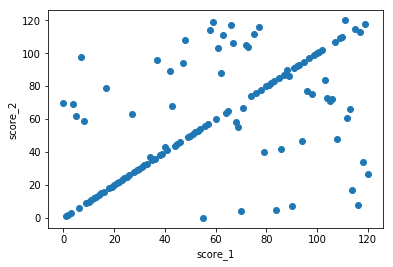

In [17]:
plt.scatter(s_1,s_2)
plt.xlabel("score_1")
plt.ylabel("score_2")

In [18]:
df#sorted

,outlier_names,outlier_nodes,deviant_properties,score_ratio,outlier_id,feature,Metric_1,Metric_3,Metric_2,severity_score1,severity_score2
100,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt73in00m4cr, rt73in01m5cr]","[[lines.ipWildcard, 126.246.0.0/16], [lines.le...",0.548387,AP-DEX-networks,route_policy,0.451613,0.582216,1.000000,0.845153,2.033829
48,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt73in00m4cr, rt73in01m5cr]","[[lines.ipWildcard, 126.246.0.0/16], [lines.le...",0.548387,AP-DEX-networks,route_filter,0.451613,0.511672,1.000000,0.742749,1.963285
108,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt55in04hrds, rt75in05hrds]","[[lines.ipWildcard, 126.0.0.0/8], [lines.lengt...",0.000000,BB-TO-DEX-networks,route_policy,1.000000,0.582216,0.296381,0.754774,1.878597
107,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...",[rt55dxce01],"[[lines.ipWildcard, 126.127.201.0/24], [lines....",0.000000,3c6dbdC_APLOOPBACK,route_policy,1.000000,0.582216,0.146391,0.667448,1.728608
109,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...",[rt55dxce01],"[[lines.ipWildcard, 126.121.12.0/22], [name, C...",0.000000,CEMEA_ENDPOINT_LOOPBACKS,route_policy,1.000000,0.582216,0.146391,0.667448,1.728608
110,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...",[rt55dxce01],"[[lines.ipWildcard, 126.127.203.21], [name, CE...",0.000000,CEMEA_TUNNEL_LOOPBACKS,route_policy,1.000000,0.582216,0.146391,0.667448,1.728608
27,"{'name': 'InterDC', 'lines': [{'action': 'PERM...","[rt73in00m4cr, rt73in01m5cr]","[[name, InterDC], [lines.matchCondition.header...",0.695565,InterDC,ip_list,0.304435,0.407515,1.000000,0.531577,1.711951
120,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt73in13p5ds, rt73in12p5ds]","[[lines.ipWildcard, 196.1.7.0/24], [lines.leng...",0.609756,evmsn-networks,route_policy,0.390244,0.582216,0.653395,0.607624,1.625856
111,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt55in70hras, rt75in71hras]","[[lines.ipWildcard, 196.1.253.129], [name, PL-...",0.000000,PL-VIP-OCC-INI-EURO-RNI-OUT,route_policy,1.000000,0.582216,0.034180,0.602116,1.616396
63,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt73in13p5ds, rt73in12p5ds]","[[lines.ipWildcard, 196.1.7.0/24], [lines.leng...",0.609756,evmsn-networks,route_filter,0.390244,0.511672,0.653395,0.534001,1.555311


In [19]:
populations = defaultdict(set)
indices = list(df.index.values)
i=[0]
def build_populations(outlier_id,index):
    populations[outlier_id].add(indices[i[0]])
    i[0]+=1
    
df.apply(lambda row: build_populations(row['outlier_id'],row), axis=1)
x=0
final_pop=defaultdict(set)
for p in populations:
    if len(populations[p])>1:
        final_pop[p] = populations[p]


def update_score(index,frac):
    df.at[index, 'severity_score'] = df.loc[index]['severity_score']*frac
    
def found_bug(idx,df = df):
    o_id = df.loc[idx]['outlier_id']
    if o_id in final_pop:
        l = final_pop[o_id]
        for n in l:
            update_score(n,1.1)
    o_feature = df.loc[idx]['feature']
    l = feature_pop[o_feature]
    for n in l:
            update_score(n,1.05)
    
    
def found_fp(idx,df=df):
    o_id = df.loc[idx]['outlier_id']
    if o_id in final_pop:
        l = final_pop[o_id]
        for n in l:
            update_score(n,0.9)
    o_feature = df.loc[idx]['feature']
    l = feature_pop[o_feature]
    for n in l:
            update_score(n,0.95)
    

In [20]:
final_pop

defaultdict(set,
            {'AP-DEX-networks': {34, 48, 80, 100},
             '3c6dbdC_APLOOPBACK': {14, 107},
             'evmsn-networks': {62, 63, 119, 120},
             'DEX-network': {50, 102},
             'AP-RNI-networks': {49, 101},
             'MVS-networks': {37, 83},
             '130': {6, 7, 8, 9, 31, 32, 33},
             'KBH-INI-networks': {59, 116},
             'OCE-INI': {73, 78},
             'DEX-OCC': {71, 76},
             'DEX-OCE': {72, 77},
             'INI-networks': {57, 67, 96, 114},
             'OCX-networks': {61, 118},
             'to-OCB': {53, 105},
             'from-OCB': {52, 104},
             'to-OCS': {54, 106},
             'BGP2TELMEX': {12, 36, 82},
             'BGP2LEVEL3': {11, 35, 81},
             '120': {3, 4, 5},
             'OCB-BT-networks': {38, 84},
             'RDH-Loopbacks': {44, 90},
             'OrangeRD2INI': {51, 103},
             'OCE-INI-TP-networks': {42, 88},
             'FROM_ORANGE_AP': {25, 55, 112},
   

In [21]:
found_bug(100)
found_fp(120)

KeyError: 'severity_score'

In [22]:
df = df.sort_values(by=['severity_score'],ascending = False)
df

KeyError: 'severity_score'

In [15]:
found_fp(63,df)

In [16]:
df.sort_values(by=['severity_score'],ascending = False)

,outlier_names,outlier_nodes,deviant_properties,score_ratio,outlier_id,feature,Metric_1,Metric_3,Metric_2,severity_score
100,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt73in00m4cr, rt73in01m5cr]","[[lines.ipWildcard, 126.246.0.0/16], [lines.le...",0.548387,AP-DEX-networks,route_policy,0.451613,0.582216,1.000000,0.927344
48,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt73in00m4cr, rt73in01m5cr]","[[lines.ipWildcard, 126.246.0.0/16], [lines.le...",0.548387,AP-DEX-networks,route_filter,0.451613,0.511672,1.000000,0.776173
108,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt55in04hrds, rt75in05hrds]","[[lines.ipWildcard, 126.0.0.0/8], [lines.lengt...",0.000000,BB-TO-DEX-networks,route_policy,1.000000,0.582216,0.296381,0.752887
107,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...",[rt55dxce01],"[[lines.ipWildcard, 126.127.201.0/24], [lines....",0.000000,3c6dbdC_APLOOPBACK,route_policy,1.000000,0.582216,0.146391,0.665779
109,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...",[rt55dxce01],"[[lines.ipWildcard, 126.121.12.0/22], [name, C...",0.000000,CEMEA_ENDPOINT_LOOPBACKS,route_policy,1.000000,0.582216,0.146391,0.665779
110,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...",[rt55dxce01],"[[lines.ipWildcard, 126.127.203.21], [name, CE...",0.000000,CEMEA_TUNNEL_LOOPBACKS,route_policy,1.000000,0.582216,0.146391,0.665779
111,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt55in70hras, rt75in71hras]","[[lines.ipWildcard, 196.1.253.129], [name, PL-...",0.000000,PL-VIP-OCC-INI-EURO-RNI-OUT,route_policy,1.000000,0.582216,0.034180,0.600611
27,"{'name': 'InterDC', 'lines': [{'action': 'PERM...","[rt73in00m4cr, rt73in01m5cr]","[[name, InterDC], [lines.matchCondition.header...",0.695565,InterDC,ip_list,0.304435,0.407515,1.000000,0.531577
120,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt73in13p5ds, rt73in12p5ds]","[[lines.ipWildcard, 196.1.7.0/24], [lines.leng...",0.609756,evmsn-networks,route_policy,0.390244,0.582216,0.653395,0.490945
80,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt55in04hrds, rt75in05hrds]","[[lines.ipWildcard, 126.244.0.0/16], [lines.le...",0.558140,AP-DEX-networks,route_policy,0.441860,0.582216,0.296381,0.471616


In [23]:
df1 = df.sort_values(by = "Metric_1",ascending = False)
df2 = df.sort_values(by = "Metric_2",ascending = False)
df3 = df.sort_values(by = "Metric_3",ascending = False)

In [24]:
df1_index = list(df1.index)
df2_index = list(df2.index)
df3_index = list(df3.index)

In [25]:
print(np.corrcoef(df1_index,df2_index)[0,1])
print(np.corrcoef(df2_index,df3_index)[0,1])
print(np.corrcoef(df1_index,df3_index)[0,1])

0.18212301856117052
0.024590163934426226
0.41331120444384223


Text(0, 0.5, 'metric_3 ranking')

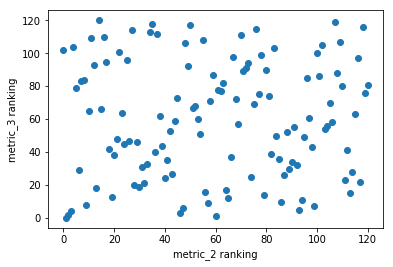

In [29]:
plt.scatter(df2_index,df3_index)
plt.xlabel("metric_2 ranking")
plt.ylabel("metric_3 ranking")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ae37f6978>],
      dtype=object)

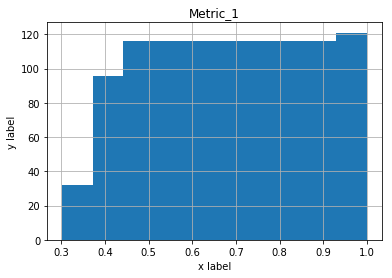

In [31]:
ax = plt.gca()
ax.set_xlabel("x label")
ax.set_ylabel("y label")
df.hist(["Metric_1"],ax = ax,cumulative = True)


/home/omik/virtualenv/batfish_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


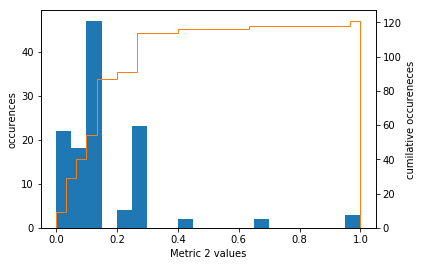

In [32]:
def plot_cdf_pdf(vals,x_label):
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    ax.set_xlabel(x_label)
    ax.set_ylabel("occurences")
    ax2.set_ylabel("cumilative occureneces")
    n, bins, patches = ax.hist(vals, bins=20, normed=False)
    n, bins, patches = ax2.hist(
        vals, cumulative=1, histtype='step', bins=30, color='tab:orange')
plot_cdf_pdf(df["Metric_2"],"Metric 2 values")

In [69]:
a = np.array([2,3,5])
(a.mean() * a.std())

4.15739709641549

In [33]:
kmeans = KMeans(n_clusters=4)
df['label1'] = kmeans.fit_predict(df[['severity_score1']])
#df['label2'] = kmeans.fit_predict(df[['severity_score2']])

In [49]:
centers = []
for i in kmeans.cluster_centers_:
    centers.append(i[0])
centers

[0.18522173752057405,
 0.6620337560822545,
 0.3751272941095908,
 0.28165959718319755]

In [51]:
centers_index = np.argsort(centers)[::-1]


label_dict = {}
for i,it in enumerate(centers_index):
    label_dict[it]=i    
centers_index

array([1, 2, 3, 0])

In [52]:
label_dict

{1: 0, 2: 1, 3: 2, 0: 3}

In [36]:
final_ranks = []
for i in centers:
    final_ranks.append(list(df[df['label1']==i].index))

In [58]:
def assign_label(label):
    return 4 - label_dict[label]

df['final_label1'] = df.apply(lambda row: assign_label(row['label1']), axis=1)

In [59]:
df

,outlier_names,outlier_nodes,deviant_properties,score_ratio,outlier_id,feature,Metric_1,Metric_3,Metric_2,severity_score1,severity_score2,label1,final_label1
100,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt73in00m4cr, rt73in01m5cr]","[[lines.ipWildcard, 126.246.0.0/16], [lines.le...",0.548387,AP-DEX-networks,route_policy,0.451613,0.582216,1.000000,0.845153,2.033829,1,4
48,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt73in00m4cr, rt73in01m5cr]","[[lines.ipWildcard, 126.246.0.0/16], [lines.le...",0.548387,AP-DEX-networks,route_filter,0.451613,0.511672,1.000000,0.742749,1.963285,1,4
108,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt55in04hrds, rt75in05hrds]","[[lines.ipWildcard, 126.0.0.0/8], [lines.lengt...",0.000000,BB-TO-DEX-networks,route_policy,1.000000,0.582216,0.296381,0.754774,1.878597,1,4
107,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...",[rt55dxce01],"[[lines.ipWildcard, 126.127.201.0/24], [lines....",0.000000,3c6dbdC_APLOOPBACK,route_policy,1.000000,0.582216,0.146391,0.667448,1.728608,1,4
109,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...",[rt55dxce01],"[[lines.ipWildcard, 126.121.12.0/22], [name, C...",0.000000,CEMEA_ENDPOINT_LOOPBACKS,route_policy,1.000000,0.582216,0.146391,0.667448,1.728608,1,4
110,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...",[rt55dxce01],"[[lines.ipWildcard, 126.127.203.21], [name, CE...",0.000000,CEMEA_TUNNEL_LOOPBACKS,route_policy,1.000000,0.582216,0.146391,0.667448,1.728608,1,4
27,"{'name': 'InterDC', 'lines': [{'action': 'PERM...","[rt73in00m4cr, rt73in01m5cr]","[[name, InterDC], [lines.matchCondition.header...",0.695565,InterDC,ip_list,0.304435,0.407515,1.000000,0.531577,1.711951,1,4
120,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt73in13p5ds, rt73in12p5ds]","[[lines.ipWildcard, 196.1.7.0/24], [lines.leng...",0.609756,evmsn-networks,route_policy,0.390244,0.582216,0.653395,0.607624,1.625856,1,4
111,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt55in70hras, rt75in71hras]","[[lines.ipWildcard, 196.1.253.129], [name, PL-...",0.000000,PL-VIP-OCC-INI-EURO-RNI-OUT,route_policy,1.000000,0.582216,0.034180,0.602116,1.616396,1,4
63,"{'lines': [{'action': 'PERMIT', 'ipWildcard': ...","[rt73in13p5ds, rt73in12p5ds]","[[lines.ipWildcard, 196.1.7.0/24], [lines.leng...",0.609756,evmsn-networks,route_filter,0.390244,0.511672,0.653395,0.534001,1.555311,1,4


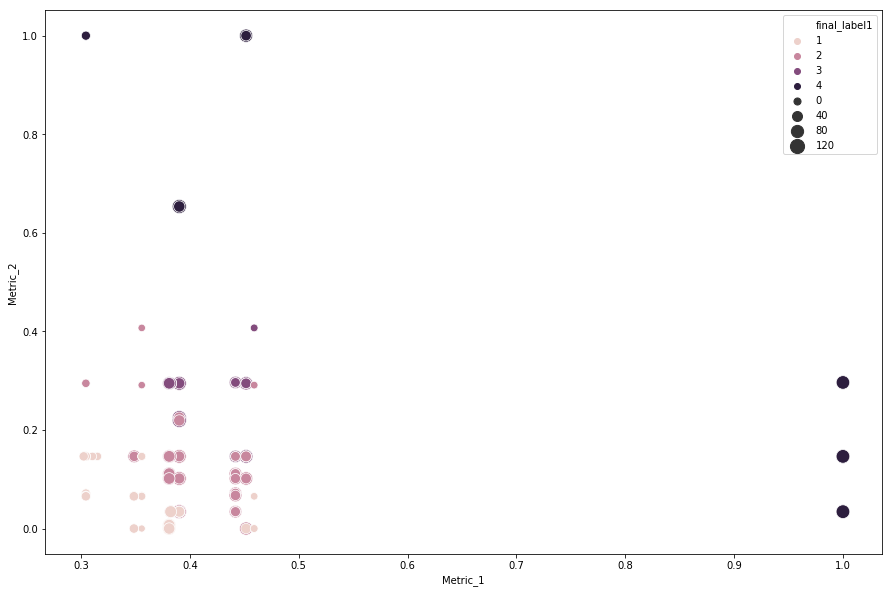

In [166]:
plt.rcParams['figure.figsize']=(15,10)
sns.scatterplot(x="Metric_1", y="Metric_2", size=df.index,sizes = (50,200),hue ="final_label1",data=df)

121

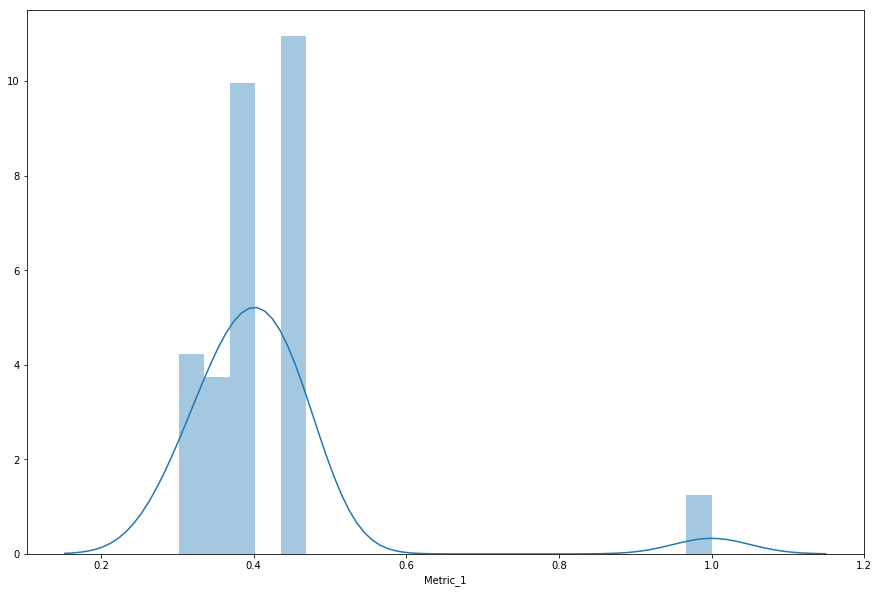

In [167]:
x = sns.distplot(df['Metric_1'],kde = True)

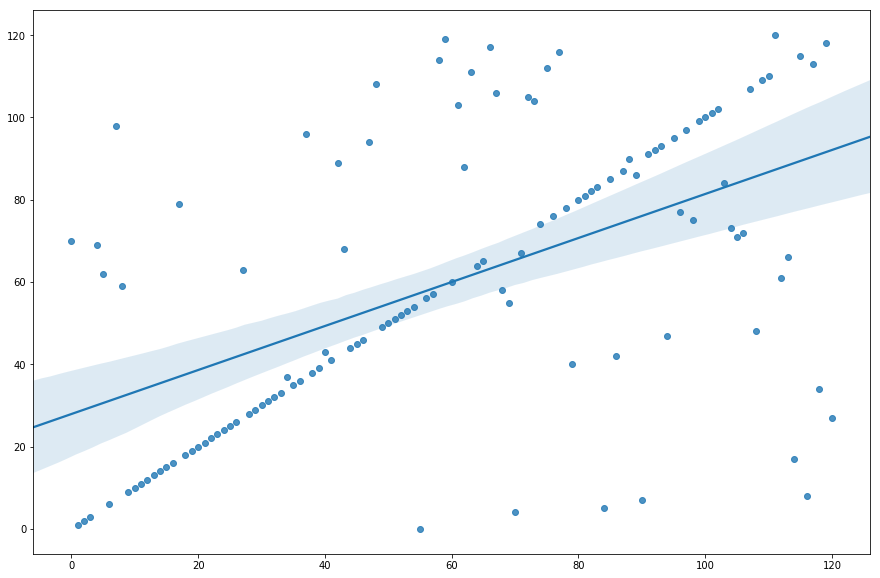

In [80]:
sns.regplot(x=list(s_1), y=list(s_2),order = 1);

In [4]:
a = [1,1,1,10]
b = [2,2,5,5]
x = b
(np.median(sorted(x[int(len(x)/2):]))+np.mean(x))

8.5

In [160]:
t = pd.read_json("campus-anon-mixed-vnet2 json files/IP_Access_List.json",orient = "index")

In [161]:
t

,10,105,11,110,111,112,113,115,120,121,...,MVS,OCC-cybs-Mochasoft-Extended,OCC-cybs-SMB-Extended,SHAPE_SCAN,TPF,Tandem,Vital,snmpline2,snmpline4,static2ospf
st73in44p4as,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
st73in59p5as,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
st73in45p4as,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
rt73ve11m5ar,None,None,None,None,"[{'name': '111', 'lines': [{'action': 'PERMIT'...","[{'name': '112', 'lines': [{'action': 'PERMIT'...","[{'name': '113', 'lines': [{'action': 'PERMIT'...","[{'name': '115', 'lines': [{'action': 'PERMIT'...",None,None,...,None,None,None,None,None,None,None,None,None,None
rt73in04m4ds,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
st73in27p4as,None,None,"[{'name': '11', 'lines': [{'action': 'PERMIT',...",None,None,None,None,None,"[{'name': '120', 'lines': [{'action': 'PERMIT'...",None,...,None,None,None,None,None,None,None,None,None,None
rt73sn11m5cr,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
st55in80hras,None,"[{'name': '105', 'lines': [{'action': 'PERMIT'...","[{'name': '11', 'lines': [{'action': 'PERMIT',...","[{'name': '110', 'lines': [{'action': 'PERMIT'...",None,None,None,None,"[{'name': '120', 'lines': [{'action': 'PERMIT'...",None,...,None,None,None,None,None,None,None,None,None,None
rt73ve10m4ar,None,None,None,None,"[{'name': '111', 'lines': [{'action': 'PERMIT'...","[{'name': '112', 'lines': [{'action': 'PERMIT'...","[{'name': '113', 'lines': [{'action': 'PERMIT'...","[{'name': '115', 'lines': [{'action': 'PERMIT'...",None,None,...,None,None,None,None,None,None,None,None,None,None
st73in66p5as,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>